In [1]:
#!pip install opencv-python


In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline


In [3]:
src1 = cv2.imread('./img1.jpg')
_img1 = cv2.resize(src1, (300, 300))


# 2.1 Color Model Visualization


### RGB


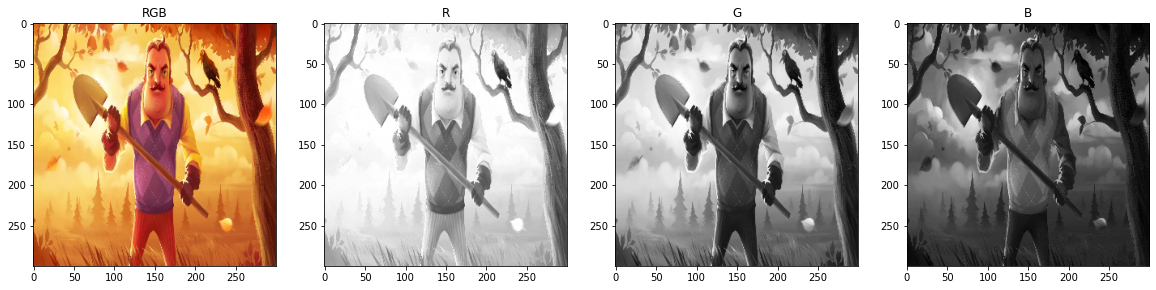

In [4]:
_rgb = cv2.cvtColor(_img1, cv2.COLOR_BGR2RGB)
f, arr = plt.subplots(1, 4, figsize=(20, 20))
R = _rgb[:, :, 0]
G = _rgb[:, :, 1]
B = _rgb[:, :, 2]
arr[0].title.set_text('RGB')
arr[0].imshow(_rgb)  # RGB
arr[1].title.set_text('R')
arr[1].imshow(R, cmap="gray")  # R
arr[2].title.set_text('G')
arr[2].imshow(G, cmap="gray")  # G
arr[3].title.set_text('B')
arr[3].imshow(B, cmap="gray")  # B
plt.show()


### HSV


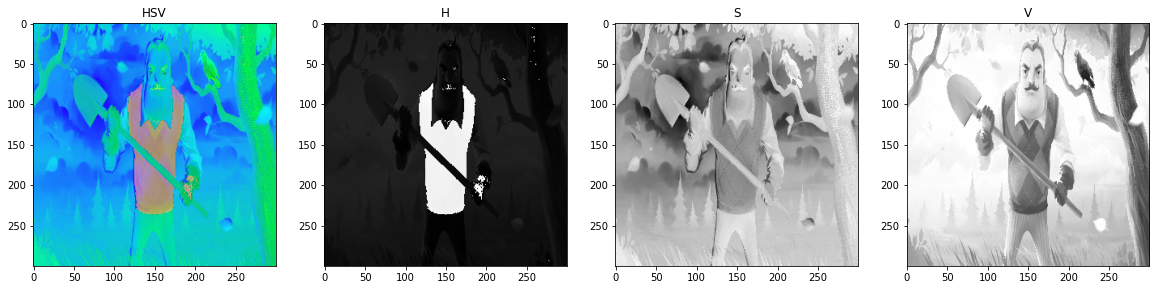

In [5]:
_hsv = cv2.cvtColor(_img1, cv2.COLOR_BGR2HSV)
f, arr = plt.subplots(1, 4, figsize=(20, 20))
R = _hsv[:, :, 0]
G = _hsv[:, :, 1]
B = _hsv[:, :, 2]
arr[0].title.set_text('HSV')
arr[0].imshow(_hsv)  # HSV
arr[1].title.set_text('H')
arr[1].imshow(R, cmap="gray")  # H
arr[2].title.set_text('S')
arr[2].imshow(G, cmap="gray")  # S
arr[3].title.set_text('V')
arr[3].imshow(B, cmap="gray")  # V
plt.show()


### HLS


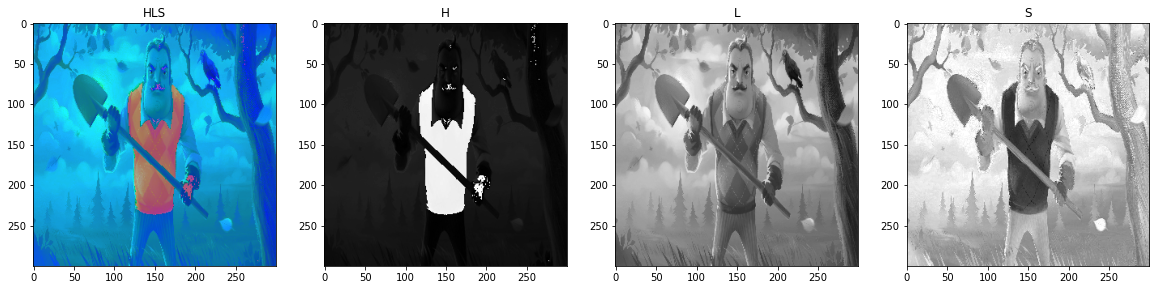

In [6]:
_hls = cv2.cvtColor(_img1, cv2.COLOR_BGR2HLS)
f, arr = plt.subplots(1, 4, figsize=(20, 20))
R = _hls[:, :, 0]
G = _hls[:, :, 1]
B = _hls[:, :, 2]
arr[0].title.set_text('HLS')
arr[0].imshow(_hls)    #
arr[1].title.set_text('H')
arr[1].imshow(R, cmap="gray")  # H
arr[2].title.set_text('L')
arr[2].imshow(G, cmap="gray")  # L
arr[3].title.set_text('S')
arr[3].imshow(B, cmap="gray")  # S
plt.show()


### YCrCb


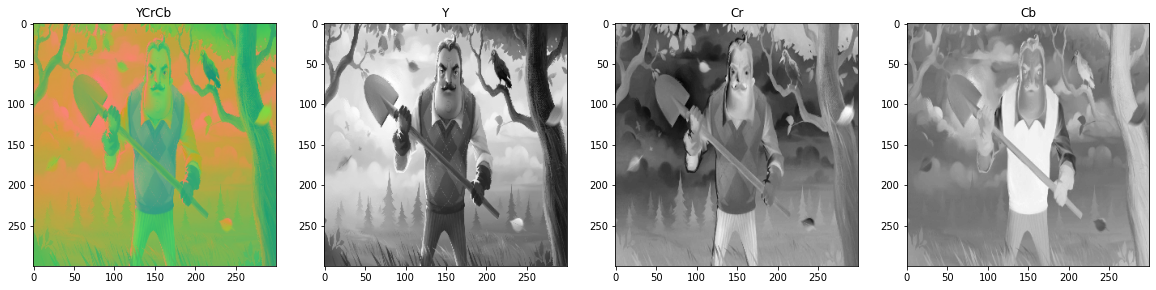

In [7]:
_ycrcb = cv2.cvtColor(_img1, cv2.COLOR_BGR2YCrCb)
f, arr = plt.subplots(1, 4, figsize=(20, 20))
R = _ycrcb[:, :, 0]
G = _ycrcb[:, :, 1]
B = _ycrcb[:, :, 2]
arr[0].title.set_text('YCrCb')
arr[0].imshow(_ycrcb)  # YCrCb
arr[1].title.set_text('Y')
arr[1].imshow(R, cmap="gray")  # Y
arr[2].title.set_text('Cr')
arr[2].imshow(G, cmap="gray")  # Cr
arr[3].title.set_text('Cb')
arr[3].imshow(B, cmap="gray")  # Cb
plt.show()


# 2.2 Image Addition


In [8]:
W1, W2 = [1, 0]

src2 = cv2.imread('./img2.jpg')
_img2 = cv2.resize(src2, (300, 300))


In [9]:
def write_video(file_path, frames, fps):
    w, h = _img2.shape[1], _img1.shape[0]   # 300, 300
    fourcc = cv2.VideoWriter_fourcc('m', 'p', '4', 'v')
    writer = cv2.VideoWriter(file_path, fourcc, fps, (w, h))

    for frame in frames:
        writer.write(frame)

    writer.release()
# ref: https://www.programcreek.com/python/example/72134/cv2.VideoWriter


In [10]:
frames = []
fps = 30
second = 3
pluser = 1 / (fps * second)
# Forward
for i in range(fps * second):
    # don't need to convert from BGR -> RGB
    img = cv2.addWeighted(_img1, W1, _img2, W2, 0.0)
    frames.append(img)
    W1 -= pluser
    W2 += pluser
# Backward
frames += frames[::-1]


In [11]:
write_video('test.mp4', frames, fps)

# 2.3 Masking


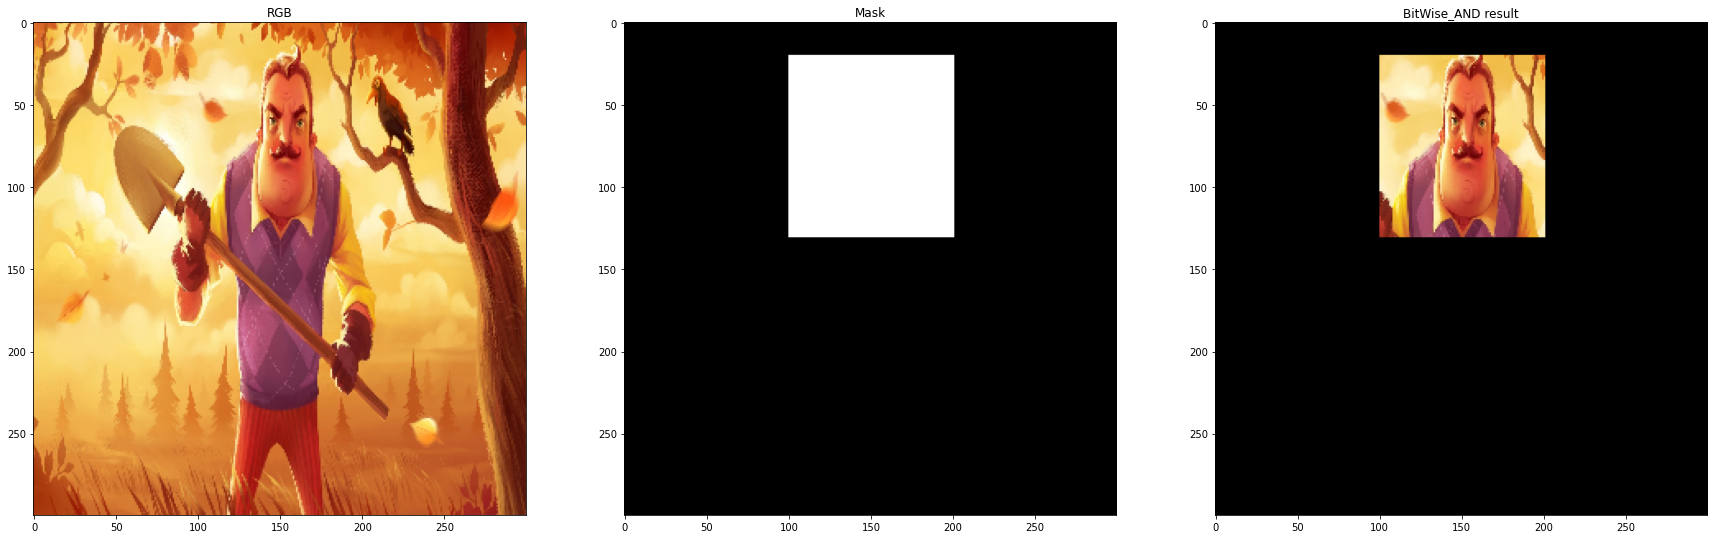

In [12]:
mask = np.zeros(_img1.shape, dtype="uint8") # create black box size 300 x 300
cv2.rectangle(mask, (100, 20), (200, 130), (255, 255, 255), -1) # create white box on black box

masked = cv2.bitwise_and(_rgb, mask)
f, ax = plt.subplots(1, 3, figsize=(30, 30))

ax[0].set_title('RGB')
ax[0].imshow(_rgb)

ax[1].set_title('Mask')
ax[1].imshow(mask)

ax[2].set_title('BitWise_AND result')
ax[2].imshow(masked)

plt.show()


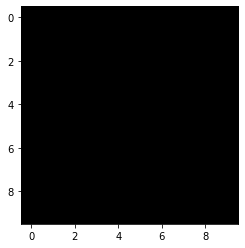

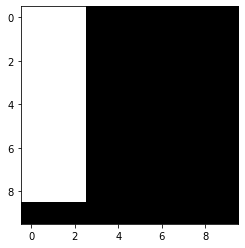

[[[255 255 255]
  [255 255 255]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [255 255 255]
  [255 255 255]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]
  [  0   0   0]]

 [[255 255 255]
  [255 255 2

In [13]:
# test array 10x10 [row] -> [column]
kkk = np.zeros((10,10,3), dtype="uint8") # create black box size 300 x 300
plt.imshow(kkk)
plt.show()
cv2.rectangle(kkk, (0, 0), (2, 8), (255, 255, 255), -1) # create white box on black box
plt.imshow(kkk)
plt.show()

print(kkk)   